In [1]:
import pandas as pd
import numpy as np
import os
import nltk as nltk

In [2]:
# nltk.download('punkt')

In [3]:
# from textblob import TextBlob 

# text = TextBlob("It was a wonderful movie. I liked it very much.")
 
# print (text.sentiment)
# print ('polarity: {}'.format(text.sentiment.polarity))
# print ('subjectivity: {}'.format(text.sentiment.subjectivity))

In [4]:
dir_path = '../google_data/NLP_data/'

In [22]:
data_path = os.path.join(dir_path, 'ART_AND_DESIGN.csv')
data_rev = pd.read_csv(data_path)
print(data_rev.shape)
data_rev.head()

(440, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",NaN,NaN,0.182146,0.492704
1,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",My kids love,Positive,0.500000,0.600000
2,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",It's best,Positive,1.000000,0.300000
3,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",My daughter kids Kindle fire using Amazon Free...,Positive,0.035714,0.304762
4,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",It geared towards older children already read....,Positive,0.178431,0.349510


In [23]:
# # English Sentence Example

# sentence = data_rev["Translated_Review"]
# sentence.split()
# # sentence = """At eight o'clock on Thursday morning
# # ... Arthur didn't feel very good."""
# # Tokenize_word
# # for i in range(len(sentence)):
# tokens_w = nltk.word_tokenize(sentence)
# tokens_w

In [24]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [25]:
data = data_rev[['Sentiment','Translated_Review']]

In [26]:
data = data[data.Sentiment!= 'NaN']

In [27]:
train, test = train_test_split(data,test_size = 0.1)

In [28]:
train_pos = train[train.Sentiment == 'Positive']
train_pos = train_pos[['Translated_Review']]
train_neg = train[train.Sentiment == 'Negative']
train_neg = train_neg[['Translated_Review']]

test_pos = test[ test['Sentiment'] == 'Positive']
test_pos = test_pos['Translated_Review']
test_neg = test[ test['Sentiment'] == 'Negative']
test_neg = test_neg['Translated_Review']

Positive words


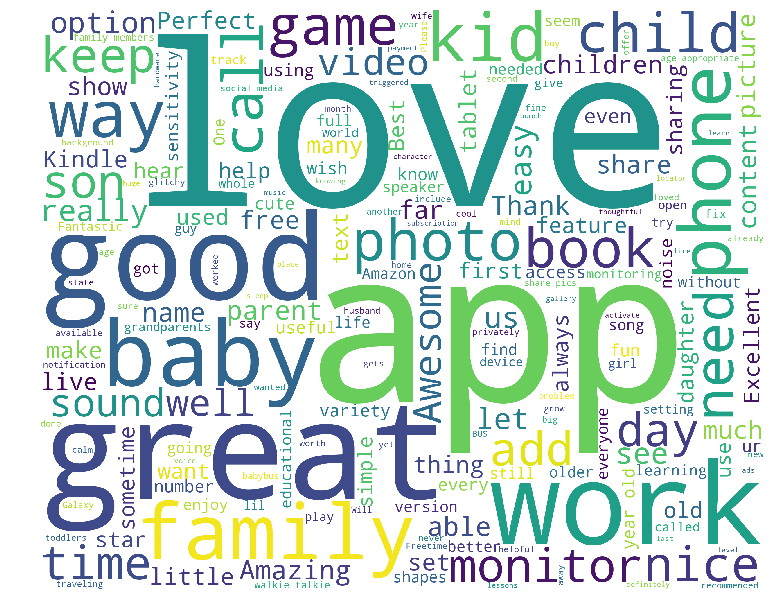

Negative words


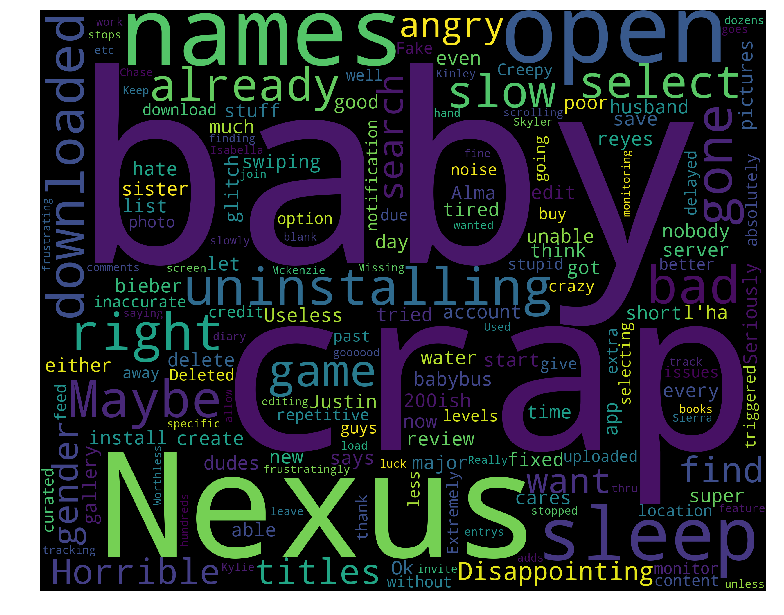

In [29]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos.Translated_Review,'white')
print("Negative words")
wordcloud_draw(train_neg.Translated_Review)

307     This much needed app! ANd thoughtful! I love it.
7      Love app! My kids never get bored educational ...
84                                                  Good
177                            It's good It's cool music
89                                       Love wished ads
55                               Used free, work payment
298    So grateful PBS honored Fred Rodger's legacy w...
44     It's the biggest bunch of k ** that one can no...
382    We downloaded place Life 360 family locator ap...
348                Love I share daughter's photos family
56                                  Simple and brilliant
164                         Good ButThis game four level
1                                           My kids love
185                               Coll This really good.
86                         Easy use, huge variety names.
398                                                 Love
46     The great! We using still, even kids 4 years o...
22     Everything great except 

In [13]:
# # data1 = FreqDist(data)
# import jieba
# data1 = data['Translated_Review']
# seg_list = jieba.cut(data1, cut_all = False)
# # seg_list
# print(seg_list)
# nltk.word_tokenize(data1)

In [14]:
# nltk.download('stopwords')

In [15]:
import pandas as pd

import nltk

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
#去掉punctuation words
from nltk.corpus import stopwords


from nltk.corpus import stopwords
stops = stopwords.words('english')
from string import punctuation

In [16]:
data1 = data[['Translated_Review']]
data1 = data1.dropna()
data2 = np.array(data1['Translated_Review'])
data2

result = []
for i in range(len(data2)):
    
    testStr = data2[i]
    tokenizer = RegexpTokenizer(r'\w+')
    i = tokenizer.tokenize(testStr)
    
#     tokens = i = nltk.word_tokenize(testStr)
#     print(tokens)
    result += i
# print(data2[0])
common_words = ['I', 'It', 'it', 'This','this']
filtered_words = [word for word in result if word not in common_words]
filtered_words
#     tokens = nltk.wordpunct_tokenize(testStr) ## 請注意，差異在cut-off
#     print(tokens)

['awesome',
 'app',
 'Love',
 'Wish',
 'stickers',
 'though',
 'But',
 'still',
 'great',
 'Awesome',
 'absolutely',
 'love',
 'Very',
 'good',
 'work',
 'nicely',
 'So',
 'nice',
 'amazing',
 'making',
 'funny',
 'images',
 'love',
 'Good',
 'hate',
 'bad',
 'eeee',
 'Good',
 'morning',
 'Good',
 'Such',
 'outstanding',
 'aap',
 'cause',
 'pic',
 'come',
 'outstanding',
 's',
 'great',
 'Bad',
 'bad',
 'horrible',
 'Jitendra',
 'Kumar',
 'Kori',
 's',
 'lovely',
 'Its',
 'gd',
 'Super',
 'Download',
 'late',
 'incredibly',
 'Holy',
 'Juer',
 's',
 'nice',
 'pranking',
 'friends',
 'Very',
 'good',
 's',
 'super',
 'cool',
 'share',
 'Saif',
 'Thu',
 'mst',
 'Ok',
 'cheat',
 'Gd',
 'Love',
 'Nice',
 'Nice',
 'Don',
 't',
 'like',
 'really',
 'small',
 'space',
 'toy',
 'try',
 'get',
 'goes',
 'way',
 'back',
 'colors',
 'need',
 'improved',
 'pics',
 'without',
 'girls',
 'uniforms',
 'pretty',
 'cool',
 's',
 'alright',
 'thing',
 'eyes',
 'become',
 'skin',
 'color',
 'instead',
 'w

In [17]:
# result
# tokens
filtered_words

['awesome',
 'app',
 'Love',
 'Wish',
 'stickers',
 'though',
 'But',
 'still',
 'great',
 'Awesome',
 'absolutely',
 'love',
 'Very',
 'good',
 'work',
 'nicely',
 'So',
 'nice',
 'amazing',
 'making',
 'funny',
 'images',
 'love',
 'Good',
 'hate',
 'bad',
 'eeee',
 'Good',
 'morning',
 'Good',
 'Such',
 'outstanding',
 'aap',
 'cause',
 'pic',
 'come',
 'outstanding',
 's',
 'great',
 'Bad',
 'bad',
 'horrible',
 'Jitendra',
 'Kumar',
 'Kori',
 's',
 'lovely',
 'Its',
 'gd',
 'Super',
 'Download',
 'late',
 'incredibly',
 'Holy',
 'Juer',
 's',
 'nice',
 'pranking',
 'friends',
 'Very',
 'good',
 's',
 'super',
 'cool',
 'share',
 'Saif',
 'Thu',
 'mst',
 'Ok',
 'cheat',
 'Gd',
 'Love',
 'Nice',
 'Nice',
 'Don',
 't',
 'like',
 'really',
 'small',
 'space',
 'toy',
 'try',
 'get',
 'goes',
 'way',
 'back',
 'colors',
 'need',
 'improved',
 'pics',
 'without',
 'girls',
 'uniforms',
 'pretty',
 'cool',
 's',
 'alright',
 'thing',
 'eyes',
 'become',
 'skin',
 'color',
 'instead',
 'w

In [18]:
groups = result
groups = filtered_words

ironmen_dict = {
                "result": groups
}

ironmen_df = pd.DataFrame(ironmen_dict)
ironmen_df
ironmen_df["result"].value_counts()

love          58
s             50
good          48
like          47
app           44
color         44
pictures      37
great         29
game          29
make          28
coloring      27
free          24
get           24
t             23
colors        23
The           23
would         22
many          22
ads           21
time          21
really        21
thing         20
easy          19
even          19
picture       19
could         18
Love          18
nice          17
using         17
add           17
              ..
chooser        1
curve          1
layers         1
neon           1
Simply         1
colorings      1
awhile         1
placing        1
poor           1
with           1
railing        1
updating       1
helped         1
selections     1
five           1
Other          1
People         1
reducer        1
order          1
VERY           1
kudos          1
developer      1
Changeable     1
original       1
graphics       1
Ive            1
shad           1
Haley         

In [19]:
a1 = ironmen_df["result"].value_counts()
# a1 = pd.value_counts(result)
a1 = pd.DataFrame(a1)
# a1.to_csv('/Users/jianweicheng/Desktop/ＮＴＵＴ/碩一下/3-2 CRM/期末報告/google_data/NLP_data/Result/'+'ART_AND_DESIGN' + '.csv', index = True)


In [20]:
# wordcloud_draw(train_pos.Translated_Review,'white').savefig('/Users/jianweicheng/Desktop/ＮＴＵＴ/碩一下/3-2 CRM/期末報告/google_data/NLP_data/Result/1', format='png', transparent=True, dpi=300, pad_inches = 0)
# a2.savefig('/Users/jianweicheng/Desktop/ＮＴＵＴ/碩一下/3-2 CRM/期末報告/google_data/NLP_data/Result/1', format='png', transparent=True, dpi=300, pad_inches = 0)
# a2.to_file('/Users/jianweicheng/Desktop/ＮＴＵＴ/碩一下/3-2 CRM/期末報告/google_data/NLP_data/Result/1')

In [21]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']